In [184]:
from qiskit.quantum_info import Pauli, Operator, DensityMatrix, Statevector
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
import numpy as np

IPSTATE = Statevector([1/np.sqrt(2), 1j*1/np.sqrt(2)])
IMSTATE = Statevector([1/np.sqrt(2), -1j*1/np.sqrt(2)])
_qc_ = QuantumCircuit(2, name='Bell Op')
_qc_.cnot(0, 1)
_qc_.h(0)
BELL_MEAS_OP = Operator(_qc_)

In [185]:
from itertools import product

PAULI_OPS = [Operator(Pauli('I')), Operator(Pauli('X')), Operator(Pauli('Y')), Operator(Pauli('Z'))]
I, X, Y, Z = PAULI_OPS
PHI_P = 1/np.sqrt(2)*(Statevector.from_label('00')+Statevector.from_label('11'))
PHI_M = 1/np.sqrt(2)*(Statevector.from_label('00')-Statevector.from_label('11'))
PSI_P = 1/np.sqrt(2)*(Statevector.from_label('10')+Statevector.from_label('01'))
PSI_M = 1/np.sqrt(2)*(Statevector.from_label('10')-Statevector.from_label('01'))


def A(x):
    if x==0:
        O=Z
    if x==1:
        O=X
    if x==2:
        O=Y
    return O

def C(z):
    if z==0:
        D = Z+X
    if z==1:
        D = Z-X
    if z==2:
        D = Z+Y
    if z==3:
        D = Z-Y
    if z==4:
        D = X+Y
    if z==5:
        D = X-Y
    D = 1/np.sqrt(2)*D
    return D

def CHSHOperator(initial_state:DensityMatrix=None, xvals=None, zvals=None, weight=[1, 1, 1, -1]):
    values = []
    for x in xvals:
        for z in zvals:
            values.append(initial_state.expectation_value(A(x).tensor(C(z)), qargs=(0, 1)))
    return sum(np.array(weight)*np.array(values))

state = DensityMatrix(PHI_P)
print(CHSHOperator(state, zvals=(0, 1), xvals=(0, 1)))
state = DensityMatrix(PHI_M)
print(CHSHOperator(state, zvals=(2, 3), xvals=(0, 2)))
state = DensityMatrix(PSI_P)
print(CHSHOperator(state, zvals=(4, 5), xvals=(1, 2)))

def CHSH3Operator(initial_state:DensityMatrix=None):
    state = initial_state.evolve(BELL_MEAS_OP, qargs=(2, 3))
    b, state = state.measure((2, 3))
    ret = 0
    ret += CHSHOperator(state, xvals=(0, 1), zvals=(0, 1), weight=[(-1)**int(b[0]), (-1)**int(b[0]), (-1)**int(b[1]), -(-1)**int(b[1])])
    ret += CHSHOperator(state, xvals=(0, 2), zvals=(2, 3), weight=[(-1)**int(b[0]), (-1)**int(b[0]), -(-1)**(int(b[1])+int(b[0])), (-1)**(int(b[1])+int(b[0]))])
    ret += CHSHOperator(state, xvals=(1, 2), zvals=(4, 5), weight=[(-1)**int(b[1]), (-1)**int(b[1]), -(-1)**(int(b[1])+int(b[0])), (-1)**(int(b[1])+int(b[0]))])
    return ret

qc = QuantumCircuit(4)
qc.h(0)
qc.h(1)
qc.cx(0, 2)
qc.cx(1, 3)
state = DensityMatrix.from_instruction(qc)
CHSH3Operator(state)


(2.8284271247461894+0j)
(2.8284271247461894+0j)
(2.8284271247461894+0j)


(8.48528137423857+0j)

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

class CHSH_Circuit(object):
    def __init__(self):
        qa = QuantumRegister(1, 'alice')
        qb = QuantumRegister(2, 'bob')
        qc = QuantumRegister(1, 'chalie')
        

/home/quic/anaconda3/envs/qiskit/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


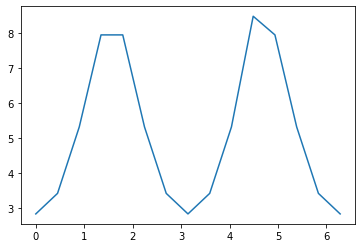

In [188]:
from qiskit.circuit import Parameter
theta = Parameter('theta')
qc = QuantumCircuit(4)
qc.ry(theta, 0)
qc.ry(theta, 1)
qc.cx(0, 2)
qc.cx(1, 3)
retval=[]
thetas = np.linspace(0, 2*np.pi, 15)
for t in thetas:
    state = DensityMatrix.from_instruction(qc.assign_parameters({theta:t}))
    retval.append(CHSH3Operator(state))

import matplotlib.pyplot as plt 
plt.plot(thetas, retval)